# Run the cell below

To run a code cell (i.e.; execute the python code inside a Jupyter notebook) you can click the play button on the ribbon underneath the name of the notebook. Before you begin click the "Run cell" button at the top that looks like ▶| or hold down `Shift` + `Return`.

In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

# Homework 07: Confidence Intervals

**Reading**: 
* [Estimation](https://www.inferentialthinking.com/chapters/13/estimation.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

This assignment is due by the deadline listed in Canvas/Gradescope. Start early so that you can come to office hours if you're stuck. Check the course website for the office hours schedule. Late work will not be accepted as per the course expectations.

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the course expectations document to learn more about how to learn cooperatively.

For all problems that you must write our explanations and sentences for, you **must** provide your answer in the designated space. Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook! For example, if you use `max_temperature` in your answer to one question, do not reassign it later on.

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Thai Restaurants


Max and Aesha are trying see what the best Thai restaurant in Durham, NC is. They survey 1500 Durham residents selected uniformly at random, and ask each of them what Thai restaurant is the best. 

**Note:** This data is fabricated for the purposes of this homework, but these restaurants are real if you wanted to try them out! 

The choices of Thai restaurant are Bua Thai, Thai Cafe, Pad Thai, and Thai Spoon. After compiling the results, Max and Aesha release the following percentages from their sample:

|Thai Restaurant  | Percentage|
|:------------:|:------------:|
|Bua Thai | 8% |
|Thai Cafe | 52% |
|Pad Thai | 25% |
|Thai Spoon | 15% |

These percentages represent a uniform random sample of the population of Durham residents. We will attempt to estimate the corresponding *parameters*, or the percentage of the votes that each restaurant will receive from the entire population (the entire population is all Durham residents). We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimates.

The table `votes` contains the results of the survey.

In [3]:
# Just run this cell
votes = Table.read_table('data/votes.csv')
votes

Vote
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai
Bua Thai


**Question 1.** Complete the function `one_resampled_percentage` below. It should return Thai Cafe's **percentage** (not proportion) of votes after simulating one bootstrap sample from `tbl`.

**Note:** `tbl` will always be in the same format as `votes`.

In [5]:
sample = votes.sample()
number_of_votes = votes.num_rows
percentage = (sample.where('Vote', are.equal_to('Thai Cafe')).num_rows) / number_of_votes * 100
percentage

50.2

In [7]:
sample.where('Vote', are.equal_to('Thai Cafe')).num_rows

753

In [8]:
def one_resampled_percentage(tbl):
    sample = tbl.sample()
    number_of_votes = votes.num_rows
    percentage = ((sample.where('Vote', are.equal_to('Thai Cafe'))).num_rows / number_of_votes) * 100
    return percentage
one_resampled_percentage(votes)

51.6

In [60]:
grader.check("q1")

q1 results: All test cases passed!

**Question 2.** Complete the `percentages_in_resamples` function such that it returns an array of 2500 bootstrapped estimates of the percentage of voters who will vote for Thai Cafe. You should use the `one_resampled_percentage` function you wrote above.


In [9]:
def percentages_in_resamples():
    percentage_thai_cafe = make_array()
    for i in range(2500):
        sample = one_resampled_percentage(votes)
        percentage_thai_cafe = np.append(percentage_thai_cafe, sample)
    return percentage_thai_cafe
percentages_in_resamples()

array([ 54.06666667,  52.2       ,  50.86666667, ...,  53.13333333,
        54.93333333,  51.13333333])

In [10]:
grader.check("q2")

q2 results: All test cases passed!

In the following cell, we run the function you just defined, `percentages_in_resamples`, and create a histogram of the calculated statistic for the 2,500 bootstrap estimates of the percentage of voters who voted for Thai Cafe. Based on what the original Thai restaurant percentages were, does the graph seem reasonable? Talk to a friend or ask your teacher if you are unsure! You don't need to provide a written response but make sure you've thought about it before moving on.

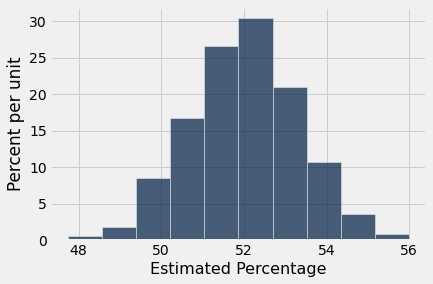

In [11]:
resampled_percentages = percentages_in_resamples()
Table().with_column('Estimated Percentage', resampled_percentages).hist("Estimated Percentage")

**Question 3.** Using the array `resampled_percentages` that was created in the previous code cell, find the values at the two edges of the middle 95% of the bootstrapped percentage estimates. (Compute the lower and upper ends of the interval, named `thai_cafe_lower_bound` and `thai_cafe_upper_bound`, respectively.)


In [12]:
thai_cafe_lower_bound = percentile(2.5, resampled_percentages)
thai_cafe_upper_bound = percentile(97.5, resampled_percentages)

# The following code wil print the results of your calculations.
# Don't change it, just run it!
print("Bootstrapped 95% confidence interval for the percentage of Thai Cafe voters in the population: [{:f}, {:f}]".format(thai_cafe_lower_bound, thai_cafe_upper_bound))

Bootstrapped 95% confidence interval for the percentage of Thai Cafe voters in the population: [49.466667, 54.600000]


In [13]:
grader.check("q3")

q3 results: All test cases passed!

**Question 4.** The survey results seem to indicate that Thai Cafe is beating all the other Thai restaurants combined among voters. We would like to use confidence intervals to determine a range of likely values for Thai Cafe's true lead over all the other restaurants combined. The calculation for Thai Cafe's lead over Bua Thai, Pad Thai, and Thai Spoon combined is:

$$\text{Thai Cafe's % of the vote} - \text{(Bua Thai's % of the vote + Pad Thai's % of the vote + Thai Spoons's % of the vote)}$$

Define the function `one_resampled_difference` that returns **exactly one value** of Thai Cafe's percentage lead over Bua Thai, Pad Thai, and Thai Spoon combined from one bootstrap sample of `tbl`.


In [14]:
len(votes.where('Vote', 'Thai Cafe').column(0))

780

In [15]:
t = votes.sample()
t.where('Vote', 'Thai Cafe').num_rows/t.num_rows, t.where('Vote', 'Thai Cafe').num_rows/t.num_rows*100

(0.5346666666666666, 53.46666666666666)

In [22]:
def one_resampled_difference(tbl):
    bootstrap = tbl.sample()
    tc_percentage = (bootstrap.where('Vote', 'Thai Cafe').num_rows / bootstrap.num_rows)*100
    bt_percentage = (bootstrap.where('Vote', 'Bua Thai').num_rows / bootstrap.num_rows)*100
    pt_percentage = (bootstrap.where('Vote', 'Pad Thai').num_rows / bootstrap.num_rows)*100
    ts_percentage = (bootstrap.where('Vote', 'Thai Spoons').num_rows / bootstrap.num_rows)*100
    print(tc_percentage, bt_percentage, pt_percentage, ts_percentage)
    return tc_percentage - (bt_percentage + pt_percentage + ts_percentage)

one_resampled_difference(votes)

52.0 7.066666666666667 25.733333333333334 0.0


19.199999999999996

In [17]:
grader.check("q4")

q4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.** Write a function called `leads_in_resamples` that finds 2,500 bootstrapped estimates (the result of calling `one_resampled_difference`) of Thai Cafe's lead over Bua Thai, Pad Thai, and Thai Spoon combined. Plot a histogram of the resulting samples. 

**Note:** Thai Cafe's lead can be negative.


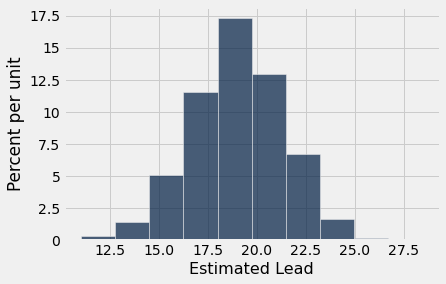

In [98]:
def leads_in_resamples():
    leads = make_array()
    for i in range(2500):
        bootstrapping = one_resampled_difference(votes)
        leads = np.append(leads, bootstrapping)
    return leads

sampled_leads = leads_in_resamples()
Table().with_column('Estimated Lead', sampled_leads).hist("Estimated Lead")

<!-- END QUESTION -->

**Question 6.** Use the simulated data from Question 1.5 to compute an approximate 95% confidence interval for Thai Cafe's true lead over Bua Thai, Pad Thai, and Thai Spoon combined.


In [99]:
diff_lower_bound = percentile(2.5, sampled_leads)
diff_upper_bound = percentile(97.5, sampled_leads)

# The following code wil print the results of your calculations.
# Don't change it, just run it!
print("Bootstrapped 95% confidence interval for Thai Cafe's true lead over Bua Thai, Pad Thai, and Thai Spoon combined: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

Bootstrapped 95% confidence interval for Thai Cafe's true lead over Bua Thai, Pad Thai, and Thai Spoon combined: [14.333333, 23.466667]


In [100]:
grader.check("q6")

q6 results:
    q6 - 1 result:
        Trying:
            -5 <= diff_lower_bound <= diff_upper_bound <= 12
        Expecting:
            True
        **********************************************************************
        Line 1, in q6 0
        Failed example:
            -5 <= diff_lower_bound <= diff_upper_bound <= 12
        Expected:
            True
        Got:
            False

## 2. Interpreting Confidence Intervals


We computed the following 95% confidence interval for the percentage of Thai Cafe voters: 

$$[49.40, 54.47]$$

Your answer may have been a bit different; that doesn't mean it was wrong! ✨Randomness✨

<!-- BEGIN QUESTION -->

**Question 7.** Can we say there is a 95% probability that the interval [49.40, 54.47] contains the true percentage of the population that votes for Thai Cafe as the best Durham Thai restaurant? Answer "yes" or "no" and explain your reasoning. 

**Note:** Ambiguous answers using language like "sometimes" or "maybe" will not receive credit.


**Yes, we can say that there is a 95% probability that the interval contains the true percentage because we have a 95% confidence interval and that is what tells us the probability.**

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 8.** Suppose your teacher also created 70%, 90%, and 99% confidence intervals from the same sample, but we forgot to label which confidence interval represented which percentages! Match each confidence level (70%, 90%, 99%) with its corresponding interval in the cell below (e.g. __ % CI: [49.87, 54.0] $\rightarrow$ replace the blank with one of the three confidence levels). Please put them in order from 70% CI, 90% CI, then 99% CI, your teacher thanks you for helping them grade this a bit easier! **Then**, explain your thought process and how you came up with your answers.

The intervals are below:

* [49.87, 54.00]
* [50.67, 53.27]
* [48.80, 55.40]


**70% CI = [50.67, 53.27]
90% CI = [49.87, 54.00]
99% CI = [48.80, 55.40]**

**I know this because the greater the range between the lower and upper number, the higher the confidence interval.** 

<!-- END QUESTION -->

**Question 9.** Suppose you received a grant that allowed you to pay to create 5,000 new samples from the population, each one a uniform random sample of 1,500 Durham residents. If you created a 95% confidence interval from each sample, roughly how many of those 5,000 intervals would you expect to actually contain the true percentage of the population that would vote for Thai Cafe?

Assign your answer to `true_percentage_intervals`.


In [18]:
true_percentage_intervals = 0.95 * 5000

Recall the second bootstrap confidence interval you created in Question 1.6, which estimated Thai Cafe's lead over Bua Thai, Pad Thai, and Thai Spoon combined. Among voters in the sample, Thai Cafe's lead was 4%. Suppose your teacher's 95% confidence interval for the true lead (in the population of all voters) was

$$[-0.80, 8.80]$$

Suppose we are interested in testing a simple yes-or-no question:

> "Is the percentage of votes for Thai Cafe tied with the percentage of votes for Bua Thai, Pad Thai, and Thai Spoon combined?"

Our null hypothesis is that the percentages are equal, or equivalently, that Thai Cafe's lead is exactly 0. Our alternative hypothesis is that Thai Cafe's lead is not equal to 0.  In the questions below, don't compute any confidence intervals yourself - use only the provided 95% confidence interval.

**Question 10.** Say we use a 5% P-value cutoff.  Do we reject the null, fail to reject the null, or are we unable to tell using the provided confidence interval?

Assign `restaurants_tied` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis

2. Fail to reject the null / Data is consistent with the null hypothesis

3. Unable to tell using our staff confidence interval

**Hint:** If you're confused, take a look at [this chapter](https://inferentialthinking.com/chapters/13/4/Using_Confidence_Intervals.html) of the textbook.


In [19]:
restaurants_tied = 1

In [20]:
grader.check("q10")

q10 results: All test cases passed!

**Question 11.** What if, instead, we use a P-value cutoff of 1%? Do we reject the null, fail to reject the null, or are we unable to tell using the provided confidence interval?

Assign `cutoff_one_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis

2. Fail to reject the null / Data is consistent with the null hypothesis

3. Unable to tell using our staff confidence interval


In [21]:
cutoff_one_percent = 2

In [22]:
grader.check("q11")

q11 results: All test cases passed!

**Question 12.** What if we use a P-value cutoff of 10%? Do we reject, fail to reject, or are we unable to tell using the provided confidence interval?

Assign `cutoff_ten_percent` to the number corresponding to the correct answer.

1. Reject the null / Data is consistent with the alternative hypothesis

2. Fail to reject the null / Data is consistent with the null hypothesis

3. Unable to tell using our staff confidence interval


In [23]:
cutoff_ten_percent = 2

In [24]:
grader.check("q12")

q12 results: All test cases passed!

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

When done exporting, download the .zip file by finding it in the file browswer on the left side of the screen, then right-click and select **Download**. You'll submit this .zip file for the assignment in Canvas to Gradescope for grading.

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()